In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_transaction.csv')
df.head(5)
#df.shape

,ATId,BusinessId,DeviceCode,TransactionID,AssociateRefTxnId,ProductId,PayModeId,Amount,TxnSource,Status,IsReversed,TransactionDate,EndPointId,StatusCode,UpdatedOn
0,143453104,343554,MAO4SLWN,2205150001320000003,NaN,49,1,666.0,2,3,1,2022-05-15 00:01:32.453,47,201,2022-05-15 00:01:33.850
1,143453105,343050,MADRKA0,2205150002320000005,NaN,51,1,479.0,2,2,2,2022-05-15 00:02:32.047,6,NaN,2022-05-15 00:02:57.303
2,143453106,190431,AS55HE7M,2205150003490000010,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:49.210,64,NaN,2022-05-15 00:03:49.570
3,143453107,190431,AS55HE7M,2205150003580000011,NaN,3039,1,0.0,2,3,3,2022-05-15 00:03:58.007,64,NaN,2022-05-15 00:03:58.303
4,143453108,190431,AS55HE7M,2205150004220000012,NaN,3039,1,0.0,2,3,3,2022-05-15 00:04:22.217,64,NaN,2022-05-15 00:04:22.467


In [3]:
df.isnull().sum(axis = 0)

ATId                      0
BusinessId                0
DeviceCode                0
TransactionID             0
AssociateRefTxnId    140078
ProductId                 0
PayModeId                 0
Amount                    0
TxnSource                 0
Status                    0
IsReversed                0
TransactionDate           0
EndPointId                0
StatusCode            68410
UpdatedOn                 5
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141002 entries, 0 to 141001
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ATId               141002 non-null  int64  
 1   BusinessId         141002 non-null  int64  
 2   DeviceCode         141002 non-null  object 
 3   TransactionID      141002 non-null  int64  
 4   AssociateRefTxnId  924 non-null     object 
 5   ProductId          141002 non-null  int64  
 6   PayModeId          141002 non-null  int64  
 7   Amount             141002 non-null  float64
 8   TxnSource          141002 non-null  int64  
 9   Status             141002 non-null  int64  
 10  IsReversed         141002 non-null  int64  
 11  TransactionDate    141002 non-null  object 
 12  EndPointId         141002 non-null  int64  
 13  StatusCode         72592 non-null   object 
 14  UpdatedOn          140997 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 16

In [5]:
final = df.drop(['ATId','DeviceCode','TransactionID','AssociateRefTxnId','TransactionDate','EndPointId','StatusCode','UpdatedOn','TxnSource'],axis = 1)
final.head()

,BusinessId,ProductId,PayModeId,Amount,Status,IsReversed
0,343554,49,1,666.0,3,1
1,343050,51,1,479.0,2,2
2,190431,3039,1,0.0,3,3
3,190431,3039,1,0.0,3,3
4,190431,3039,1,0.0,3,3


In [6]:
final['PayModeId'].value_counts()

1    141002
Name: PayModeId, dtype: int64

## Obseravations:
Every transaction is cash pay on this day

In [7]:
final['Status'].value_counts()
# 1 - inProcess
# 2 - Success
# 3 - Failed
# 4 - Rejected
# 5 - Partial Sucess
# 6 - Cancelled

2    88279
3    52468
6      221
5       28
1        6
Name: Status, dtype: int64

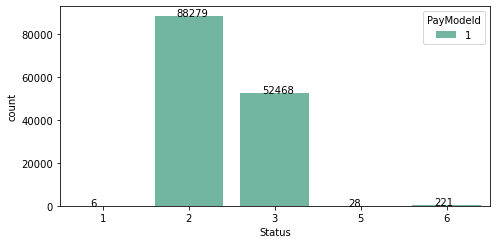

In [8]:
# count plot for PayModeId and Status
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(hue = 'PayModeId',x = 'Status',data = final,palette = 'Set2')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#sns.countplot(final['PayModeId'])

In [9]:
a = final.ProductId.value_counts()
a[:10]
#len(a)

3041    46101
3039    38328
3047    17826
3037    15550
3046     5133
49       4260
51       2367
3045     2304
81       2139
3049     1716
Name: ProductId, dtype: int64

In [10]:
a = final.BusinessId.value_counts()
a[:10]

132764    423
320523    343
367455    287
151699    287
67765     259
164213    252
89763     245
2565      244
359245    237
371526    230
Name: BusinessId, dtype: int64

([<matplotlib.patches.Wedge at 0x1d969b29cd0>,
 [Text(1.0127515198255042, 0.4293417742208785, '132764'),
  Text(-0.21764547663010417, 1.0782534240624766, '320523'),
  Text(-0.8369282340318484, -0.713828502569302, '367455'),
  Text(0.7114268127670482, -0.838970732550379, '151699'),
  Text(1.0770428478392717, -0.22355917319195698, '67765')],
 [Text(0.5524099199048204, 0.2341864223022973, '12.76%'),
  Text(-0.11871571452551136, 0.5881382313068053, '30.81%'),
  Text(-0.45650630947191717, -0.38936100140143737, '35.33%'),
  Text(0.38805098878202626, -0.45762039957293393, '14.58%'),
  Text(0.587477917003239, -0.12194136719561288, '6.51%')])

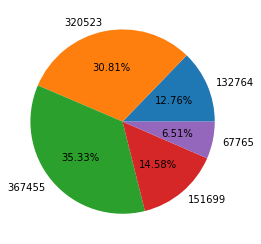

In [11]:
Bussiness_names=final.BusinessId.value_counts().index
bussi_val=final.BusinessId.value_counts().index
plt.pie(bussi_val[:5],labels=Bussiness_names[:5],autopct='%1.2f%%')

In [12]:
z = final[final['BusinessId']==132764].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
zx = pd.DataFrame(z)
zx
zx['Amount'].sort_values(ascending = False)

65    10000.0
64     8000.0
63     7920.0
62     6000.0
61     5000.0
       ...   
4       499.0
3       400.0
2       300.0
1         1.0
0         0.0
Name: Amount, Length: 66, dtype: float64

In [13]:
amt = 0
for i in range(len(zx)):
    amt += (zx['Amount'][i]*zx['Count'][i])
print(amt)    
#np.sum(zx['Amount']*zx['Count'])

993292.53


# Observations
The business ID 132764 is used most of the time.

total amount associate with it is around 993292.53

In [14]:
d =final[final['BusinessId'] == 367455].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
e = final[final['BusinessId'] == 320523].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
#d
f = final[final['BusinessId'] == 151699].groupby('Amount').size().reset_index().rename(columns={0:'Count'})
f

,Amount,Count
0,0.0,170
1,15.0,2
2,25.0,1
3,99.0,1
4,100.0,3
5,110.0,2
6,125.0,1
7,210.0,3
8,300.0,1
9,310.0,3


In [15]:
np.sum(f['Amount']*f['Count'])

148259.0

## Bussiness catalog

In [16]:
buss_data = pd.read_csv('Bussiness.csv')
buss_data.head()
#buss_data.shape

,BusinessID_Old,IdentificationCode,Salutation,FirstName,MiddleName,LastName,Business,ContactPerson,EstDate,Status,...,IsCashTopupAllow,AccountManagerID,CompanyID,BusinessIdentityID,UpdateBy,referredby,referredbyname,UniqueRefID,BusinessClass,MCCCode
0,NaN,bd18aa14,Na,RAVI,NaN,KUMAR,janral store,RAVI KUMAR,13-01-2022,4.0,...,0.0,NaN,1.0,2.0,0.0,Retailer,7607121333,2.201130e+14,NaN,NaN
1,NaN,74f957e7,Na,NADEEM,NaN,AHMAD,Aadil bike servise,NADEEM AHMAD,19-01-2022,4.0,...,0.0,NaN,1.0,2.0,0.0,Others,Arbaj,2.201190e+14,NaN,NaN
2,NaN,fcec25b0,Na,Sushant,NaN,Kumar,SHOPIFY CAMPL,SUSHANT AARYA,21-01-2022,1.0,...,0.0,NaN,1.0,2.0,0.0,Others,NaN,2.201210e+14,Bronze,NaN
3,NaN,1c3bf125,Na,Rajendra,NaN,NaN,PALAK CYBER ZONE,RAJENDRA RAJENDRA,25-01-2022,1.0,...,0.0,NaN,1.0,2.0,0.0,Distributor,gop5121,2.201250e+14,Bronze,NaN
4,NaN,19985f5f,Na,Rajeev,NaN,Kumar,Rajeev online & photo studio,RAJEEV KUMAR,29-01-2022,1.0,...,0.0,NaN,1.0,2.0,0.0,Distributor,MB7U7RNS,2.201290e+14,Bronze,NaN


In [17]:
buss_data.isnull().sum()

BusinessID_Old          28343
IdentificationCode          6
Salutation                  6
FirstName                   0
MiddleName              22594
LastName                  963
Business                 7293
ContactPerson               6
EstDate                     6
Status                      6
AccountManagerID_Old    28349
CompanyID_Old           28349
Unnamed: 12             28349
BusinessId                  6
ParentId                  302
CreatedOn                   6
UpdateBy_Old            28349
UpdateOn                    6
CreatedFrom                 6
IsCashTopupAllow            6
AccountManagerID        28349
CompanyID                   6
BusinessIdentityID          6
UpdateBy                    6
referredby                391
referredbyname           3883
UniqueRefID               130
BusinessClass           17475
MCCCode                 28231
dtype: int64

In [18]:
x = buss_data[buss_data['BusinessId'] == 367455].groupby('Business').size().reset_index().rename(columns={0:'Count'})
y = buss_data[buss_data['BusinessId'] == 320523].groupby('Business').size().reset_index().rename(columns={0:'Count'})
z = buss_data[buss_data['BusinessId'] == 132764].groupby('Business').size().reset_index().rename(columns={0:'Count'})
z1 =buss_data[buss_data['BusinessId'] == 151699].groupby('Business').size().reset_index().rename(columns={0:'Count'})
x
y
z1

,Business,Count


In [19]:
final_df=pd.merge(final,buss_data,on='BusinessId', how='left')
final_df.head()
# final_df.shape

,BusinessId,ProductId,PayModeId,Amount,Status_x,IsReversed,BusinessID_Old,IdentificationCode,Salutation,FirstName,...,IsCashTopupAllow,AccountManagerID,CompanyID,BusinessIdentityID,UpdateBy,referredby,referredbyname,UniqueRefID,BusinessClass,MCCCode
0,343554,49,1,666.0,3,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,343050,51,1,479.0,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190431,3039,1,0.0,3,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,190431,3039,1,0.0,3,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,190431,3039,1,0.0,3,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
final_df.isnull().sum()

BusinessId                   0
ProductId                    0
PayModeId                    0
Amount                       0
Status_x                     0
IsReversed                   0
BusinessID_Old          141002
IdentificationCode      121382
Salutation              121382
FirstName               121382
MiddleName              135158
LastName                122573
Business                121385
ContactPerson           121382
EstDate                 121382
Status_y                121382
AccountManagerID_Old    141002
CompanyID_Old           141002
Unnamed: 12             141002
ParentId                121383
CreatedOn               121382
UpdateBy_Old            141002
UpdateOn                121382
CreatedFrom             121382
IsCashTopupAllow        121382
AccountManagerID        141002
CompanyID               121382
BusinessIdentityID      121382
UpdateBy                121382
referredby              121474
referredbyname          122464
UniqueRefID             121382
Business

In [21]:
final_df[final_df['Amount'] > 20000].groupby('Business').size().reset_index().rename(columns={0:'Count'})
final_df[final_df['Amount'] > 20000].groupby('Business').size().reset_index().rename(columns={0:'Count'})

,Business,Count
0,N K Enterprises,4
1,RK ENTERPRISE,3
2,UNIQUE TOUR AND TRAVELS,1


([<matplotlib.patches.Wedge at 0x1d96a3ed340>,
 [Text(0.804303721064258, 0.7503969111624783, 'Dildar Cyber Cafe'),
  Text(-0.5755455459991358, 0.9374152358909881, 'Rafikul Store'),
  Text(-1.077762344291874, -0.22006437518708974, 'SRI KANAKA DURGA'),
  Text(-0.19321664944048553, -1.0828976527719472, 'JAMAN STORE'),
  Text(0.9212556323265684, -0.6010724248429425, 'OVITOP TECHNOLOGY PRIVATE LIMITED')],
 [Text(0.43871112058050427, 0.40930740608862454, '23.90%'),
  Text(-0.31393393418134674, 0.5113174013950844, '19.73%'),
  Text(-0.5878703696137494, -0.12003511373841257, '19.15%'),
  Text(-0.10539089969481029, -0.5906714469665166, '18.82%'),
  Text(0.5025030721781282, -0.32785768627796863, '18.40%')])

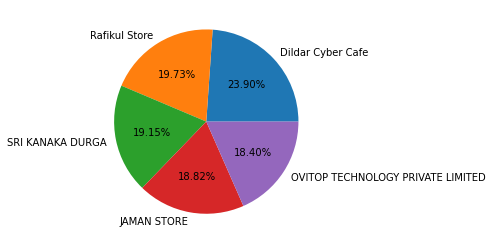

In [22]:
buss_names=final_df.Business.value_counts().index
buss_val=final_df.Business.value_counts().values
plt.pie(buss_val[:5],labels=buss_names[:5],autopct='%1.2f%%')